### Authors : LABIAD Salah Eddine / ATERHI Mouad
### UM6P - IST&I/AL KHWARIZMI - MSD

# **Mini project: Modeling the spread of an epidemic** 

We would like to apply a few numerical methods, to simulate the spread over time of an epidemic (the coronavirus for example) within a given population $P$. We use the model, called $ SIR $, which assumes that the population is divided into 3 compartments:

$$
\begin{align}
& S:\hbox{healthy or Susceptible individuals.}\\
& I:\hbox{those who are Infected.}\\
& R:\hbox{those who are Recovered.}\\\\
\end{align}
$$

These populations obviously vary over time. Let us denote them respectively $S(t)$, $I(t)$ and $R(t)$.

The system of differential equations which these populations obey is written:

$$(1) \left\lbrace
\begin{array}{lll}
\dfrac{dS(t)}{dt} = -\beta I(t)S(t) \\\\
\dfrac{dI(t)}{dt} = \beta I(t)S(t) - \frac{1}{\lambda} I(t) - \mu I(t) \\\\
\dfrac{dR(t)}{dt} = \frac{1}{\lambda} I(t)\\

\end{array}
\right.
$$

where $ \beta > 0 $ denotes the incidence rate, $ \lambda $ is the number of days on average during which an individual remains ill and $ \mu $ is a parameter whose value is proportional to the virulence of the contaminating agent.

We have to add initial conditions, to the system $ (1) $ : 

$$ S(0) = S_0 \hbox{ ; } I(0) = I_0 \hbox{ ; } R(0) = R_0 $$

We assume here that $ R_0 = 0 $, which expresses the fact that no individual is immune at the start of the infection period. 


### **Model parameters**

- Final time of the simulations: $ T = 30 $  days. 
- For the initial conditions, take $ S_0 $, $ I_0 $ such that: 
$$ 0< S_0 < 1$$ $$ 0< I_0 < 1$$
- Choose the parameters of the model $ \lambda $, $ \beta $ and $ \mu $ such as: 
$$ 5 \leq \lambda \leq 30$$ $$ 0< \beta < 1$$ $$ 0< \mu < 0.11 $$

### **Cauchy problem**

The system $ (1) $ is given by: 

$$
\left\lbrace
\begin{array}{lll}
	S'(t) = -\beta I(t)S(t)\\\\
	I'(t) = \beta I(t)S(t) - \frac{1}{\lambda} I(t) - \mu I(t)\\\\
	R'(t) = \frac{1}{\lambda} I(t)\\
\end{array}
\right.
\Longleftrightarrow Y'(t) = F(t, Y(t))$$

With $ Y(t) = (S(t), I(t), R(t))^{T} \in \mathbb{R}^{3}$ and $F$ is the function defined by: 

\begin{eqnarray*}
F : &[0,T]\times \mathbb{R}^{3}& \longrightarrow \mathbb{R}^{3}\\
&(t, (x, y, z))& \longmapsto F(t, (x, y, z)) = y\left( -\beta x, \beta x -\frac{1}{\lambda} - \mu, \frac{1}{\lambda} \right)^{T}.
\end{eqnarray*}

We are thus reduced to solving the Cauchy problem:

$$(2) \left\lbrace
\begin{array}{ll}

Y'(t) = F(t, Y(t)) \\\\
Y(0) = Y_{0} = (S_{0}, I_{0}, 0)^{T}\\
\end{array}
\right.
$$


# **Implementation of some approximation methods**

In this part, we will express each of the methods: explicit Euler, implicit Euler, Runge-Kutta 2 (of Heun) and Runge-Kutta 4, for the differential system $ (2) $.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import ipywidgets as widgets
from ipywidgets import interactive, interact_manual, widget, GridspecLayout, fixed, Layout
%matplotlib inline

### **Defining the function F**

In [ ]:
def F(S, I, beta, lam, mu):
    return [-beta*S*I, beta*S*I - (1/lam + mu)*I, (1/lam)*I]

#### **1 - Explicit Euler**

The **explicit Euler** schema is given by:$$Y_{n+1} = Y_{n} + hF(t_{n},Y_{n}) $$

In [ ]:
def Y_Euler_exp(T, n, S0, I0, beta, lam, mu):
    h = T/n
    Y0 = np.array([S0, I0, 0])
    Y = [Y0]

    for i in range(n):
        Y0 = Y0 + h*np.array(F(Y0[0], Y0[1], beta, lam, mu))
        Y.append(Y0)
        
    return Y

#### **2 - Implicit Euler**

The **implicit Euler** schema is given by:
$$Y_{n+1} = Y_{n} + hF(t_{n+1},Y_{n+1}) $$

To solve the above equation, we have to solve the equation:
$$\phi(Y_{n+1}) = 0$$

Where $\phi$ is the function defined by:

\begin{eqnarray*}
\phi : &\mathbb{R}^{3}& \longrightarrow \mathbb{R}^{3}\\
&Y_{n+1}& \longmapsto \phi(Y_{n+1}) = Y_{n+1} - Y_{n} - hF(t_{n+1},Y_{n+1}) .\newline
\end{eqnarray*}

So we have:
$$
\phi(Y_{n+1}) = 0 
\Longleftrightarrow
\left\lbrace
\begin{array}{lll}
S_{n+1} + h\beta S_{n+1}I_{n+1} - S_{n} = 0 \\\\
I_{n+1} - h\beta S_{n+1}I_{n+1} + h\left( \dfrac{1}{\lambda} + \mu \right) I_{n+1} - I_{n} = 0 \\\\
R_{n+1} - \dfrac{h}{\lambda} I_{n+1} = 0\\
\end{array}
\right.
$$


The **semi-implicit** method can be used by replacing $I_{n+1}$, in the $1^{st}$ equation, by $I_{n}$, and we will find:

$$
\left\lbrace
\begin{array}{lll}
\left( 1 + h\beta I_{n} \right) S_{n+1} = S_{n}\\\\
\left( 1 - h\beta S_{n+1} + h\left( \dfrac{1}{\lambda} + \mu \right) \right) I_{n+1} = I_{n}\\\\
R_{n+1} = \dfrac{h}{\lambda} I_{n+1}
\end{array}
\right.
\Longleftrightarrow 
\left\lbrace
\begin{array}{lll}
S_{n+1} = \dfrac{S_{n}}{1 + h\beta I_{n}}\\\\
\left( 1 - h\beta \dfrac{S_{n}}{1 + h\beta I_{n}} + h\left( \dfrac{1}{\lambda} + \mu \right) \right) I_{n+1} = I_{n}\\\\
R_{n+1} = \dfrac{h}{\lambda} I_{n+1}
\end{array}
\right.
\Longleftrightarrow 
\left\lbrace
\begin{array}{lll}
S_{n+1} = \dfrac{S_{n}}{1 + h\beta I_{n}}\\\\
I_{n+1} = \dfrac{\left(1 + h\beta I_{n} \right)I_{n}}{\alpha}\hspace {2cm}  
\\\\
R_{n+1} = \dfrac{h\left(1 + h\beta I_{n} \right)I_{n}}{\lambda \alpha}
\end{array}
\right.
\\
$$

Where $\alpha = (1+h\beta I_{n}) \left( 1 + h\left( \dfrac{1}{\lambda} + \mu \right)  - h\beta S_{n} \right) $

Hence the expression for $ Y_{n + 1} $. 

In [ ]:
def Y_Euler_imp(T, n, S0, I0, beta, lam, mu):
    h = T/n
    Y0 = np.array([S0, I0, 0])
    Y = [Y0]
    
    for i in range(n):
        alpha = (1 + h*beta*Y0[1]) * ((1 + h*(1/lam + mu)) - h*beta*Y0[0])
        
        S0 = Y0[0]/(1 + h*beta*Y0[1])
        I0 = ((1 + h*beta*Y0[1]) * Y0[1]) / alpha
        
        Y0 = Y0 + h*np.array(F(S0, I0, beta, lam, mu))
        Y.append(Y0)

    return Y

####**3 - Runge-Kutta 2 (of Heun)**
The **Runge-Kutta of order 2 (of Heun)** schema is given by:

$$Y_{n+1} = Y_{n} + \dfrac{h}{2} \left( F(t_{n},Y_{n}) + F(t_{n+1},Y_{n}+hF(t_{n},Y_{n}) \right)$$

Or:
$$ Y_{n+1} = Y_{n} + \dfrac{h}{2} (k_{1} + k_{2}) $$

With $k_{1} = F(t_{n},Y_{n})$ and $k_{2} = F(t_{n+1},Y_{n} + h k_{1})$

In [ ]:
def Y_Heun(T, n, S0, I0, beta, lam, mu):
    h = T/n
    Y0 = np.array([S0, I0, 0])
    Y = [Y0]
    
    for i in range(n):

        k1 = np.array(F(Y0[0], Y0[1], beta, lam, mu))
        k2 = np.array(F((Y0 + h*k1)[0], (Y0 + h*k1)[1], beta, lam, mu))

        Y0 = Y0 + (h/2)*(k1 + k2)
        Y.append(Y0)
        
    return Y

**4 - Runge-Kutta 4**

The **Runge-Kutta of order 4** schema is given by:


$$ Y_{n+1} = Y_{n} + \dfrac{h}{6}(k_{1} + 2k_{2} + 2k_{3} + k_{4})$$

With
$$\left\lbrace
\begin{array}{lll}
k_{1} = F(t_{n}, Y_{n})\\\\
k_{2} = F\left(t_{n} + \dfrac{h}{2}, Y_{n} + \dfrac{h}{2}k_{1} \right)\\
k_{3} = F\left(t_{n} + \dfrac{h}{2}, Y_{n} + \dfrac{h}{2}k_{2} \right)\\\\
k_{4} = F(t_{n} + h, Y_{n} + hk_{3})\\
\end{array}
\right.
$$


In [ ]:
def Y_RK4(T, n, S0, I0, beta, lam, mu):
    h = T/n
    Y0 = np.array([S0, I0, 0])
    Y = [Y0]
    
    for i in range(n):
        k1 = np.array(F(Y0[0], Y0[1], beta, lam, mu))
        k2 = np.array(F((Y0 + (h/2)*k1)[0], (Y0 + (h/2)*k1)[1], beta, lam, mu))
        k3 = np.array(F((Y0 + (h/2)*k2)[0], (Y0 + (h/2)*k2)[1], beta, lam, mu))
        k4 = np.array(F((Y0 + h*k3)[0], (Y0 + h*k3)[1], beta, lam, mu))
        
        Y0 = Y0 + (h/6)*(k1 + 2*(k2 + k3) + k4)
        Y.append(Y0)
        
    return Y

# **Testing of the methods**

In this part, we will test the numerical methods mentioned above for the simulation of the $ SIR $ model using an interactive interface. 

For this interactive interface we will use [Ipywidgets](https://github.com/jupyter-widgets/ipywidgets) which designates a set of graphical components for the Python language (slider, combo box, buttons, etc.) intended to make notebooks more interactive. Basically, it is an architecture that links a Python object (the widget), running in the kernel, to its JavaScript/HTML/CSS representation running in the browser.

In [ ]:
def simulation_sir(func_num, S0, I0, beta, lam, mu, T, n):
  
  func_names = [('explicit Euler', 1), ('implicit Euler', 2), ('Runge-Kutta 2', 3), ('Runge-Kutta 4', 4)]

  if func_num == 1:
    Y_app = Y_Euler_exp(T, n, S0, I0, beta, lam, mu)

  elif func_num == 2:
    Y_app = Y_Euler_imp(T, n, S0, I0, beta, lam, mu)
  
  elif func_num == 3:
    Y_app = Y_Heun(T, n, S0, I0, beta, lam, mu)
  
  elif func_num == 4:
    Y_app = Y_RK4(T, n, S0, I0, beta, lam, mu)
  
  S_E_app = [ Y_app[i][0] for i in range(len(Y_app))]
  I_E_app = [ Y_app[i][1] for i in range(len(Y_app))]
  R_E_app = [ Y_app[i][2] for i in range(len(Y_app))]

  t = np.linspace(0,T,n+1)
  pp = np.array(S_E_app) + np.array(I_E_app) + np.array(R_E_app)
  
  plt.style.use('ggplot')
  fig = plt.figure(figsize=(20,10))
  plt.plot(t, S_E_app, color = "blue", label = "Healthy population")
  plt.plot(t, I_E_app, color = "red", label = "Infected population")
  plt.plot(t, R_E_app, color ="green", label = "Recovered population")
  plt.plot(t, pp, color ="orange", label = "Total population")
  plt.xlabel('Time (days)')
  plt.ylabel('Workforce')
  plt.xticks(np.arange(0, T+2, 2))
  plt.yticks(np.arange(0,1.1,0.1))
  ttl = 'Solution approached by ' + str(func_names[func_num-1][0])
  plt.title(ttl)
  plt.legend()
  plt.grid(True)

  return plt.show()

func_num = widgets.Dropdown(options=[('explicit Euler', 1), ('implicit Euler', 2),('Runge-Kutta 2', 3),
                                     ('Runge-Kutta 4', 4)],description='Function :')
S0 = widgets.FloatSlider(min=0, max=1, step=0.01,description='S0')
I0 = widgets.FloatSlider(min=0, max=1, step=0.01,description='I0')
beta = widgets.FloatSlider(min=0, max=1, step=0.1, description='\u03B2')
lam = widgets.IntSlider(min=5, max=30, step=1, description='\u03BB')
mu = widgets.FloatSlider(min=0, max=0.1, step=0.01, description='\u03BC')
T = fixed(30)
n = widgets.IntSlider(min=1, max=500, step=1,value = 15,description='n')
l1 = widgets.dlink((S0, 'value'), (I0, 'value'),lambda x: 1-x)
l2 = widgets.dlink((I0, 'value'), (S0, 'value'),lambda x: 1-x)

widget = widgets.interactive_output(simulation_sir,{'func_num':func_num,'S0': S0,'I0': I0,
                                                    'beta': beta,'lam': lam,'mu': mu,'T': T, 'n':n})

grid = GridspecLayout(7, 4)
grid[0, 0] = func_num
grid[1, 0] = S0
grid[2, 0] = I0
grid[4, 0] = lam
grid[3, 0] = beta
grid[5, 0] = mu
grid[6, 0] = n
grid[:6, 1:] = widget
grid[6:, 1:] = widgets.GridBox([widgets.Label('\u03B2 : the incidence rate.'),
                                widgets.Label('\u03BB : the average number of days during which one person remains ill.'),
                                widgets.Label('\u03BC : a parameter whose value is proportional to the virulence of the contaminating agent.'),],
                               layout=Layout(height='auto', width='auto'))

display(grid)

GridspecLayout(children=(Dropdown(description='Function :', layout=Layout(grid_area='widget001'), options=(('e…

*a screenshot of the interactive interface made by ipywidgets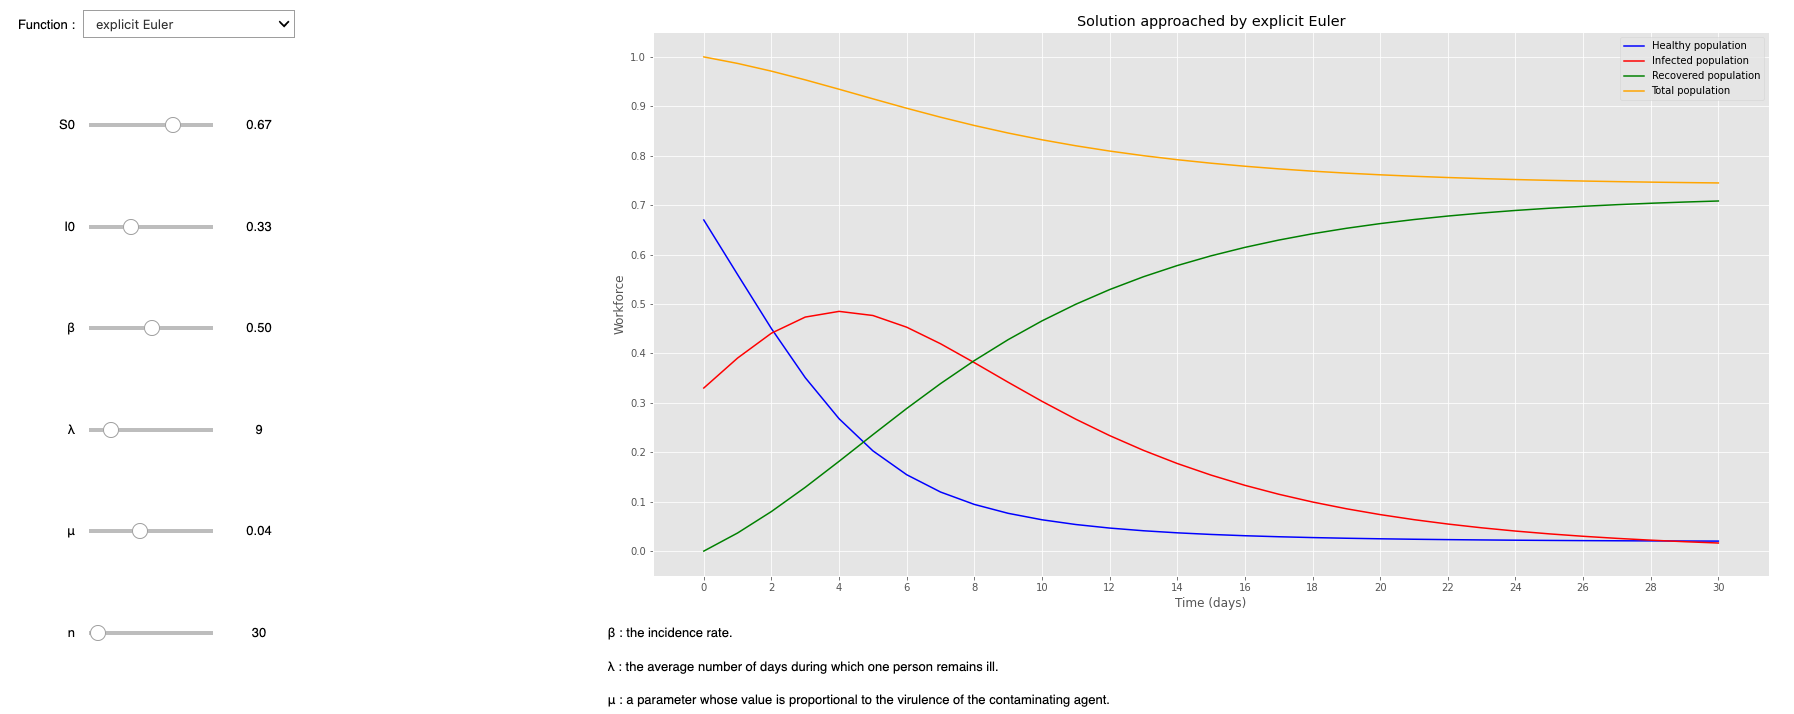*

# **Errors of numerical methods**

We assume that the **Runge-Kutta method of order 4 is the exact** solution of the system.
In the following, we will see how the errors, of the methods of explicit Euler, implicit Euler and of Runge-Kutta of order 2 (of Heun), evaluate according to the number of iterations. 

In [ ]:
def simulation_error(S0, I0, beta, lam, mu, T):
  
  def error(method, n):
    Y_exacte = np.array(Y_RK4(T, n, S0, I0, beta, lam, mu))
    Y_approx = np.array(method(T, n, S0, I0, beta, lam, mu))
    return np.linalg.norm(Y_exacte - Y_approx)

  n = np.arange(10, 300, 10)

  err_Euler_exp = [error(Y_Euler_exp, i) for i in n]
  err_Euler_imp = [error(Y_Euler_imp, i) for i in n]
  err_Heun = [error(Y_Heun, i) for i in n]

  plt.style.use('ggplot')
  plt.figure(figsize=(16,8))
  plt.plot(n, err_Euler_exp, color = "blue", label = "explicit Euler")
  plt.plot(n, err_Euler_imp, color = "red", label = "implicit Euler")
  plt.plot(n, err_Heun, color ="green", label = "Runge-Kutta 2")
  plt.xlim([0, 300])
  plt.ylim([0, 0.5])
  plt.grid(True)
  plt.title("Errors of the three methods")
  plt.xlabel("Number of iterations (N)")
  plt.ylabel('Error')
  plt.legend()
  
  return plt.show()

S0 = widgets.FloatSlider(min=0, max=1, step=0.01,description='S0')
I0 = widgets.FloatSlider(min=0, max=1, step=0.01,description='I0')
beta = widgets.FloatSlider(min=0, max=1, step=0.1, description='\u03B2')
lam = widgets.IntSlider(min=5, max=30, step=1, description='\u03BB')
mu = widgets.FloatSlider(min=0, max=0.1, step=0.01, description='\u03BC')
T = fixed(30)
l1 = widgets.dlink((S0, 'value'), (I0, 'value'), lambda x: 1-x)
l2 = widgets.dlink((I0, 'value'), (S0, 'value'), lambda x: 1-x)

widget = widgets.interactive_output(simulation_error, {'S0': S0, 'I0': I0,'beta': beta,
                                                       'lam': lam,'mu': mu,'T': T})

grid = GridspecLayout(7, 4)
grid[1, 0] = S0
grid[2, 0] = I0
grid[4, 0] = lam
grid[3, 0] = beta
grid[5, 0] = mu
grid[:6, 1:] = widget

display(grid)

GridspecLayout(children=(FloatSlider(value=0.0, description='S0', layout=Layout(grid_area='widget001'), max=1.…